<h1 style="color:Green;">Week 5 Lab (Optional)</h1> 

<a style="color:purple;" href="https://docs.google.com/presentation/d/19Obcx1-CXj9NM-W656BXElaxcn29jy2w1v3hzoSi3Rg/edit">[Week 5 Lecture Link Here]</a>

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from matplotlib.ticker import FuncFormatter
import pandas_datareader as pdr

<h2 style="color:Green;">Problem 1: Trials of Flipping Coins</h2><br/>
Suppose that you tossed an unbiased coin 50 times, and got 20 heads and 30 tails. <br/>
Let $x_{1}, x_{2}, ..., x_{50}$ be the outcomes of the coinflips and $\theta$ be the probability of getting heads, <br/>
Since the coin is unbiased, it is reasonable to assume a prior $\theta \sim$ Uniform(0,1). <br/>
You use a multiple-trial Bernoulli as a likelihood, meaning $x_{i} \mid \theta \sim$ Bernoulli($\theta$), $i\in\{1,2,...,50\}$.

a) Please name the posterior distribuition of of this experiment in the following markdown chunk. In other words, find the distribution for $\theta \mid x_{1}, x_{2},...,x_{50}$ Make sure the following chunk is set to 'Markdown' from the dropdown above.

[Write your answer here]

b) Please write a piece of code to graph the posterior distribution you specified in a). Make sure the following chunk is set to 'Code' from the dropdown above.

In [ ]:
[Write your code here]

<h2 style="color:Green;">Problem 2: Imbalanced Labels for Stock Directions</h2><br/>

Imbalanced classification is a classification predictive modeling problem where the distribution of examples across the classes is not equal. For example, we may collect measurements of cats and have 80 samples of one cat species and 20 samples of a second cat species. This represents an example of an imbalanced classification problem. A 50-50 or a near-50-50 sample species would form a balanced classification problem.<br/>

As a quantitative analyst, you are curious as to how a stock direction behave throughout a certian period. You want to investigate any label-imbalance problems before diving into actual modeling. <br/>

Please read this blog before jumping into this question: https://machinelearningmastery.com/what-is-imbalanced-classification/

a) Go ahead and select a stock, then specify its ticker and the duration of the it's price data you want to explore.

In [29]:
################ EDIT CODE LINE HERE #################

SYMBOL = '' # Enter stock ticker symbol
TAU =   # duration span (in years) of observed data

#####################################################

Run the following code chunk. This will binarize the returns for the asset over the period you specified above. In other words, the asset's price will be transformed into 0's and 1's - 0 if price did not go up, 1 if price went up. A plot is produced to show the label distribution. For instance, there should be one column showing how many days the stock goes up and another showing how many days the stock goes down.<br/>

<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

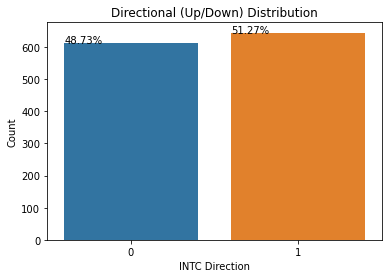

In [30]:
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
stockPx = pdr.get_data_yahoo(SYMBOL, START_DATE, END_DATE)['Adj Close'] # storing adjusted stock prices into a variable 
stockPx01 = pd.DataFrame((stockPx.pct_change().dropna() > 0).astype(int))
# visualize class distribution
ax = sns.countplot(x='Adj Close', data=stockPx01)
plt.title('Directional (Up/Down) Distribution')
plt.xlabel(SYMBOL + ' Direction')
plt.ylabel('Count')
total = len(stockPx01['Adj Close'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x() 
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))

Are the lables balanced or imbalanced? <br/>

[Write your answer here]

c) How do you think they can affect our prediction? (Hint: think about what the training data will look like)

[Write your answer here]

d) Please suggest one way to handle imbalanced data? (Hint: think about ways to re-balance the labels, or ask google)

[Write your answer here]

<h2 style="color:Green;">Problem 3: Selecting Asset Pairs with Hedge Ratio</h2>

Seeing the impactful work that you are doing, a portfolio manager approaches you and asks for your recommendation of two assets with a positive hedge ratio to add to his portfolio. Notice that any two assets can be selected, and not just stocks. For example, cryptocurrency and foreign exchange instruments can be suggested as well. Some relatively new cryptocurrencies (e.g., Solana, USD Coin) only have complete data dating back to three or four years ago, so setting the duration of data further back than these dates may result in inaccurate representation of their relationships. (Hint: remember that hedge ratio is equivalent to the regression coefficient)

a) Please specify your asset tickers and their data duration here. 

In [50]:
################ EDIT CODE LINE HERE #################

PAIR = ['',''] # Enter the two assets' symbols here
TAU =          # duration span (in years) of observed data

####################################################

Feel free to change up the asset pair as many times as you need, then re-run the following code chunks to test the hedge ratios between different pairs of assets. Stop until you find one that has positive hedge ratio. (Hint: you don't have to calculate the exact hedge ratio, just use the scatter plot as help)
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [ ]:
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
assetPx = pdr.DataReader(PAIR, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
# converting prices to log returns and removing NaN values
assetLogRet = np.log(assetPx).diff().dropna()
# Visualizing scatter plot (with simple regression line) to demonstrate the relaaaationship between the asset pairs
fig, axes= plt.subplots(figsize=(8,4), ncols=1)
points = axes.scatter(assetLogRet[PAIR[0]],
                         assetLogRet[PAIR[1]],
                         c=np.linspace(0.1, 1, len(assetLogRet)), 
                         s=15, 
                         cmap='winter')
cbar = plt.colorbar(points)
cbar.ax.set_yticklabels([str(p.year) for p in assetLogRet[::len(assetLogRet)//10].index]);
sns.regplot(x=PAIR[0], y=PAIR[1], 
            data=assetLogRet, 
            scatter=False, 
            color='k',
            line_kws={'lw':1, 
                      'ls':'--'})

b) Why did you select the two assets above? Please describe the hedge ratio between the two assets (i.e., are their strong or weak?)

[Write your answer here]